### Problem Statement: Loan Approval Prediction Problem
Type: Loan approval prediction through binary classification is a classic problem that involves applying various data analysis techniques to create the best classification model. The dataset contains applicant details and the status of their loan application, approved or not. The goal is to create a binary classification model with maximum accuracy.

In [1]:
### Step 1
### Import the packages numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics

In [2]:
### Step 2:Load the Dataset

In [3]:
### Step 3:Explore the data-shape,visualisation

In [4]:
### Step 4:X,y-->train data test data->Fit the model with training data  predict with the test data

In [5]:
#Basic and most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("/content/loan_prediction.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='Gender', ylabel='count'>

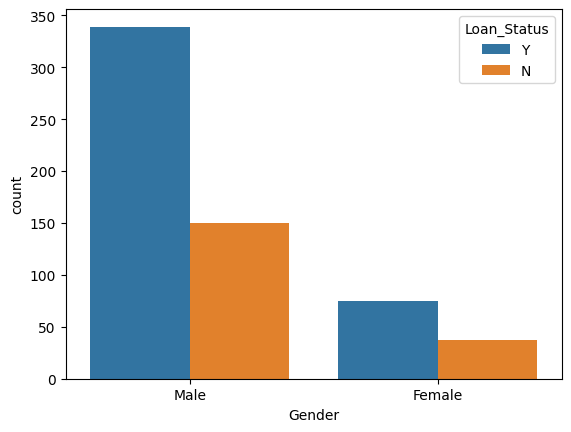

In [9]:
sns.countplot(x="Gender",hue="Loan_Status",data=data)

<Axes: xlabel='Married', ylabel='count'>

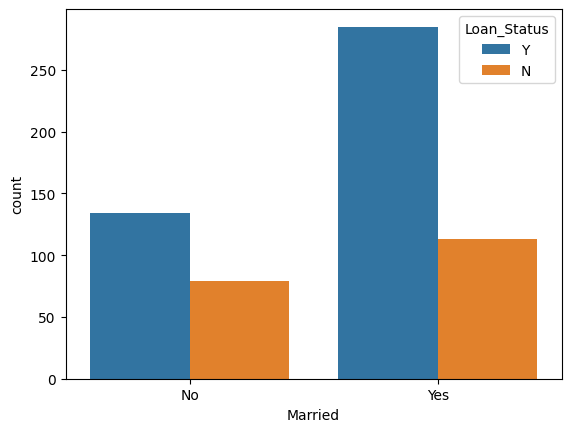

In [10]:
sns.countplot(x="Married",hue="Loan_Status",data=data)

In [11]:
correlation_mat = data.corr()

<Axes: >

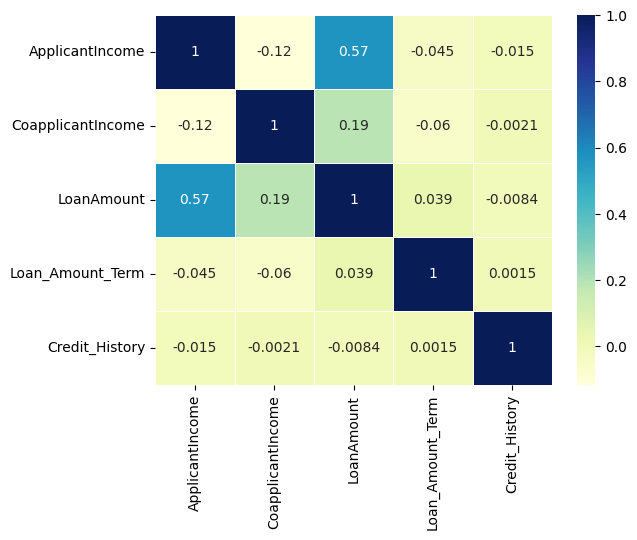

In [12]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")


### There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

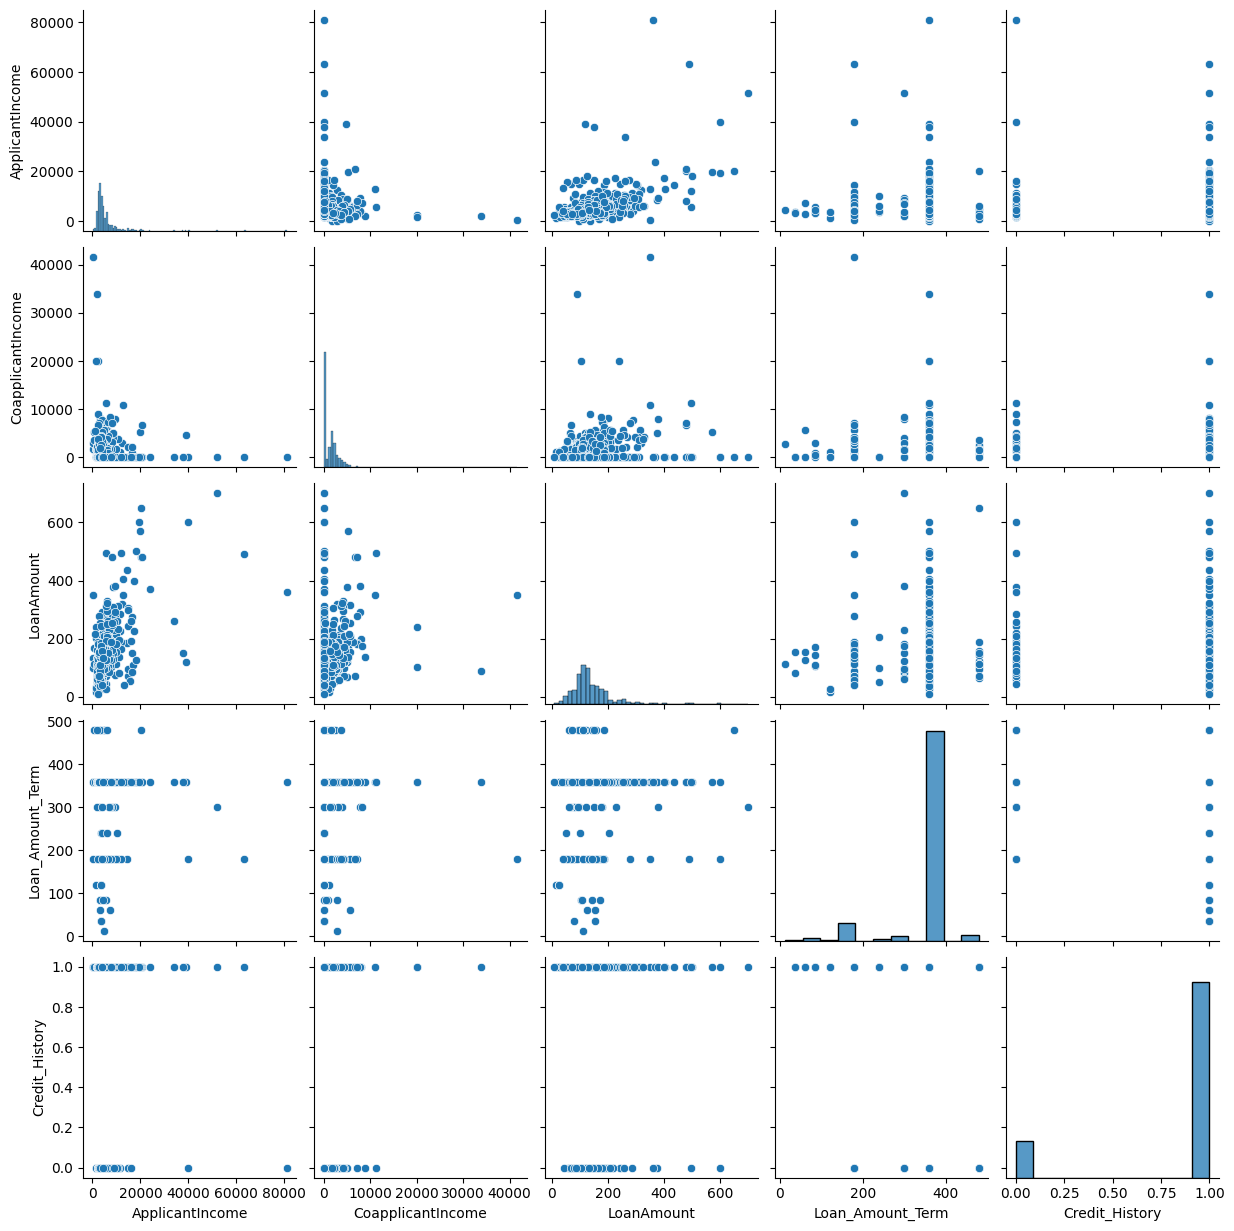

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

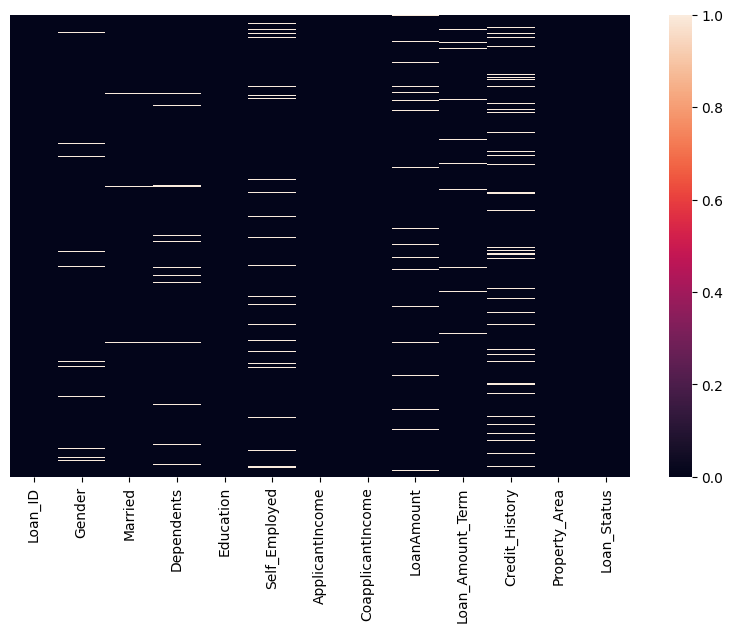

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

Prepare data for model training i.e. removing ouliers , filling null values

In [18]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

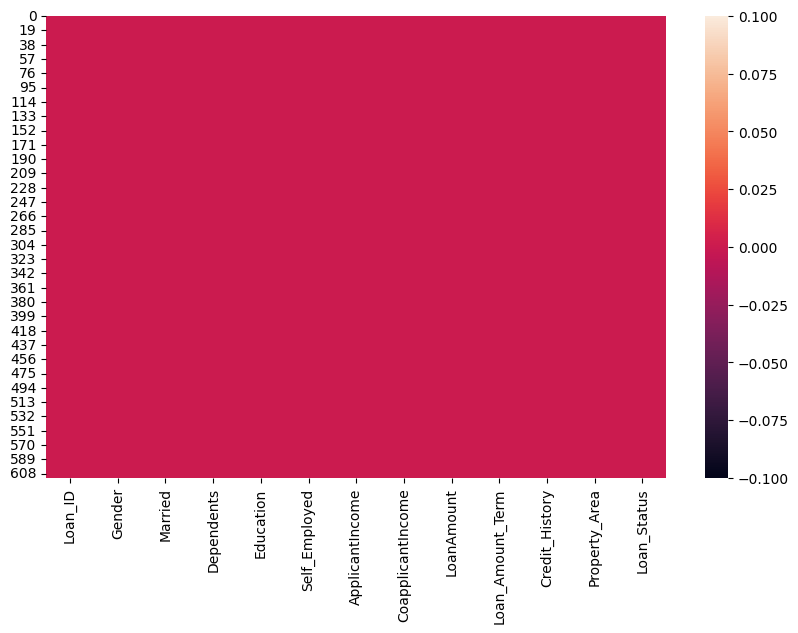

In [19]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [20]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [22]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data["Loan_Status"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
model=LogisticRegression(solver="liblinear")

In [25]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [26]:
model.score(X_train,y_train)

0.8018648018648019

In [27]:
model.score(X_test,y_test)

0.8324324324324325

In [28]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dtree.score(X_train,y_train)


1.0

In [30]:
dtree.score(X_test,y_test)

0.7351351351351352

In [31]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))


0.8181818181818182


In [32]:
y_predict = dTreeR.predict(X_test)

In [33]:
print(dTreeR.score(X_test, y_test))

0.8108108108108109


In [34]:
from sklearn import metrics

<Axes: >

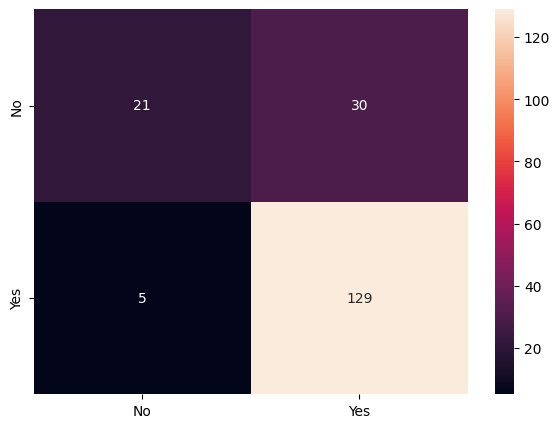

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [36]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.827027027027027


<Axes: >

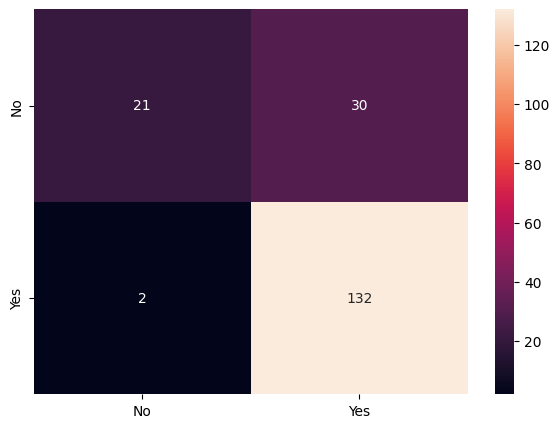

In [37]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [38]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8216216216216217


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.8108108108108109


<Axes: >

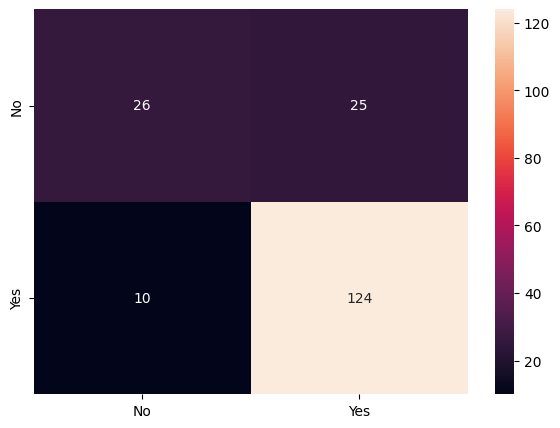

In [40]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)


0.8


<Axes: >

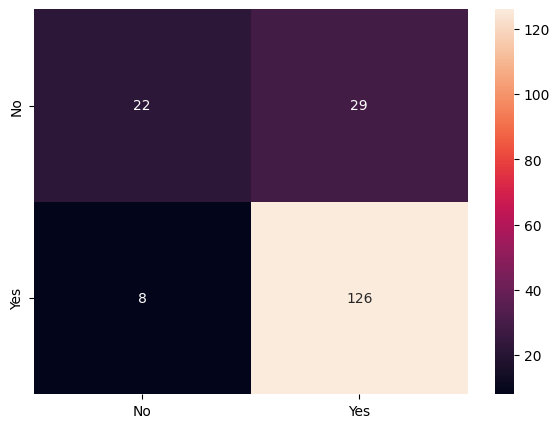

In [42]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [43]:
from scipy.stats import zscore

In [44]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale

XScaled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-8.100650e-17,6.654105e-17,2.893089e-18,1.735854e-17,-3.761016e-17,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16,-5.786179e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-2.117107e+00,-1.372089e+00,-7.378063e-01,-5.283622e-01,-3.926007e-01,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00,-1.318513e+00
25%,4.723426e-01,-1.372089e+00,-7.378063e-01,-5.283622e-01,-3.926007e-01,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01,-1.318513e+00
50%,4.723426e-01,7.288155e-01,-7.378063e-01,-5.283622e-01,-3.926007e-01,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01,-4.760721e-02
75%,4.723426e-01,7.288155e-01,2.534696e-01,-5.283622e-01,-3.926007e-01,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01,1.223298e+00
max,4.723426e-01,7.288155e-01,2.236021e+00,1.892641e+00,2.547117e+00,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01,1.223298e+00


In [45]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' ,metric='euclidean')

In [46]:
NNH.fit(XScaled, y)

KNeighborsClassifier(metric='euclidean', weights='distance')